In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dane wejściowe
output_mapper = {0: "pauza/przerywnik", 1: "nic"}
data = {
    "HY_2024_film_07.wav": (3372, 0.11376518218623481, 4, 1),
    "HY_2024_film_16.wav": (4575, 0.16130738311825682, 2, 0),
    "HY_2024_film_02.wav": (511, 0.0217706203135651, 1, 0),
    "HY_2024_film_12.wav": (0, 0.0, 0, 0),
    "HY_2024_film_11.wav": (1853, 0.061357615894039735, 2, 1),
    "HY_2024_film_14.wav": (596, 0.019377702636798128, 1, 1),
    "HY_2024_film_15.wav": (0, 0.0, 0, 1),
    "HY_2024_film_04.wav": (0, 0.0, 0, 1),
    "HY_2024_film_03.wav": (0, 0.0, 0, 0),
    "HY_2024_film_08.wav": (2353, 0.1286706403456007, 3, 0),
    "HY_2024_film_13.wav": (4684, 0.22500840659076715, 2, 0),
    "HY_2024_film_10.wav": (3074, 0.09112468133040849, 5, 1),
    "HY_2024_film_05.wav": (570, 0.023482882214806575, 1, 0),
    "HY_2024_film_06.wav": (0, 0.0, 0, 1),
    "HY_2024_film_19.wav": (6649, 0.17976586368183417, 3, 0),
    "HY_2024_film_01.wav": (786, 0.03812018041612105, 1, 0),
    "HY_2024_film_17.wav": (3790, 0.10083541744266482, 3, 1),
    "HY_2024_film_09.wav": (0, 0.0, 0, 1),
    "HY_2024_film_20.wav": (0, 0.0, 0, 1),
    "HY_2024_film_18.wav": (4400, 0.14193548387096774, 3, 0)
}

# Tworzymy DataFrame z danych
df = pd.DataFrame.from_dict(data, orient='index', columns=['pause_sum', 'pause_percent', 'amount_of_pauses', 'predicted_class'])

# Resetowanie indeksu, aby mieć nazwę pliku jako kolumnę
df.reset_index(inplace=True)

# Zmieniamy nazwę kolumny 'index' na 'file_name'
df.rename(columns={'index': 'file_name'}, inplace=True)

# Wyświetlamy ramkę danych
print("Dane wejściowe:")
print(df)

# Krok 1: Przygotowanie danych
# Usunięcie kolumny 'file_name', która nie jest potrzebna do trenowania
X = df.drop(columns=['file_name', 'predicted_class'])  # Features
y = df['predicted_class']  # Target (Etykiety)

# Krok 2: Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Krok 3: Normalizacja danych (opcjonalne, ale często pomocne)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Dane wejściowe:
              file_name  pause_sum  pause_percent  amount_of_pauses  \
0   HY_2024_film_07.wav       3372       0.113765                 4   
1   HY_2024_film_16.wav       4575       0.161307                 2   
2   HY_2024_film_02.wav        511       0.021771                 1   
3   HY_2024_film_12.wav          0       0.000000                 0   
4   HY_2024_film_11.wav       1853       0.061358                 2   
5   HY_2024_film_14.wav        596       0.019378                 1   
6   HY_2024_film_15.wav          0       0.000000                 0   
7   HY_2024_film_04.wav          0       0.000000                 0   
8   HY_2024_film_03.wav          0       0.000000                 0   
9   HY_2024_film_08.wav       2353       0.128671                 3   
10  HY_2024_film_13.wav       4684       0.225008                 2   
11  HY_2024_film_10.wav       3074       0.091125                 5   
12  HY_2024_film_05.wav        570       0.023483            

In [6]:
# Krok 4: Trenowanie modelu XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)

# Krok 5: Predykcja na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Krok 6: Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

# Dodatkowe kroki:
# Jeżeli chcesz zapisać model lub predykcje, możesz to zrobić tak:
# np. zapisywanie predykcji
df_predictions = pd.DataFrame({'file_name': df['file_name'].iloc[X_test.index], 'predicted_class': y_pred})
print("Predictions:")
print(df_predictions)

/home/dawid/Python_projects/hackyeah-project-2k24/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:51:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of the model: 75.00%
Predictions:
              file_name  predicted_class
9   HY_2024_film_08.wav                0
19  HY_2024_film_18.wav                0
13  HY_2024_film_06.wav                1
4   HY_2024_film_11.wav                0


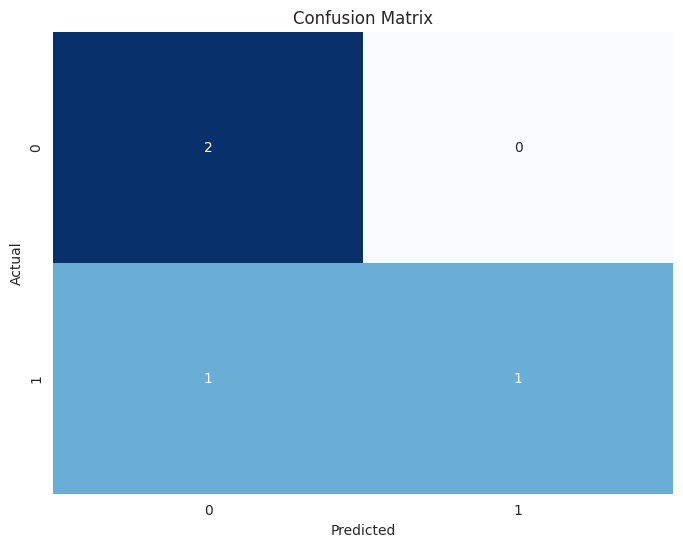

In [7]:
cm = confusion_matrix(y_test, y_pred)

# Krok 6: Wizualizacja macierzy klasyfikacji
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
import joblib
# Retraining model on full dataset
X_scaled = scaler.fit_transform(X)
# Krok 3: Trenowanie modelu XGBoost na całym zbiorze danych
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_scaled, y)

# Krok 4: Zapisanie modelu lokalnie
model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)

# Krok 5: Opcjonalne wyświetlenie podsumowania modelu
print(f'Model został zapisany w pliku: {model_filename}')
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

/home/dawid/Python_projects/hackyeah-project-2k24/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model został zapisany w pliku: xgboost_model.pkl


['scaler.pkl']

In [4]:
from  hackyeah_project_lib.models.xgboost_class import xgboostclass
from  hackyeah_project_lib.audio_processing.audio_features import PauseDetection


In [5]:
model = xgboostclass(model_path = 'xgboost_model.pkl', scaler_path = 'scaler.pkl')
converter = PauseDetection(path = "/home/dawid/Python_projects/hackyeah-project-2k24/data/wetransfer_hackyeah-2024-breakwordtraps_2024-09-28_0449/HY_2024_film_08.wav")

In [6]:
data = converter.pause_interval()
model.predict(data)

[[0, 10943], [17680, 18134], [18758, 19615], [28188, 29230]]
Predykcje: [0]


0

array([0])